In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["Unnamed: 32", 'id'], inplace=True, axis= 1)

In [5]:
data = data.rename(columns={"diagnosis": "target"})

In [6]:
data.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
print("Data Shape:", data.shape)

Data Shape: (569, 31)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

B    357
M    212
Name: target, dtype: int64


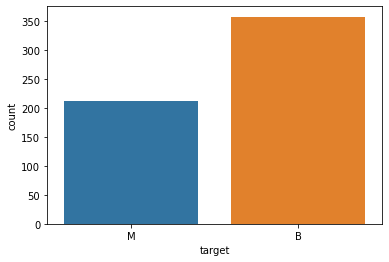

In [9]:
sns.countplot(data["target"])
print(data.target.value_counts())

In [10]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target] 

In [11]:
describe = data.describe()
describe

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
corr_matrix = data.corr()

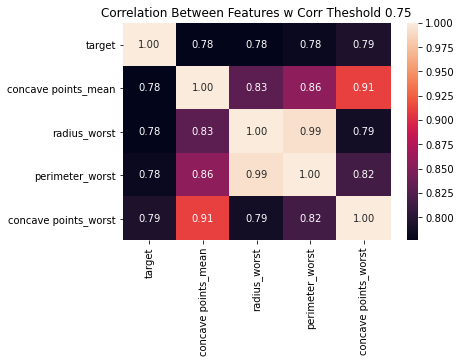

In [13]:
threshold = 0.75 
filtre = np.abs(corr_matrix["target"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

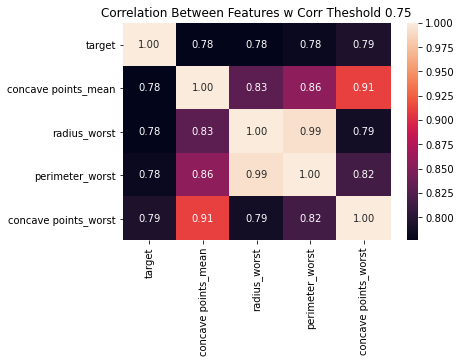

In [14]:
threshold = 0.75 
filtre = np.abs(corr_matrix["target"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

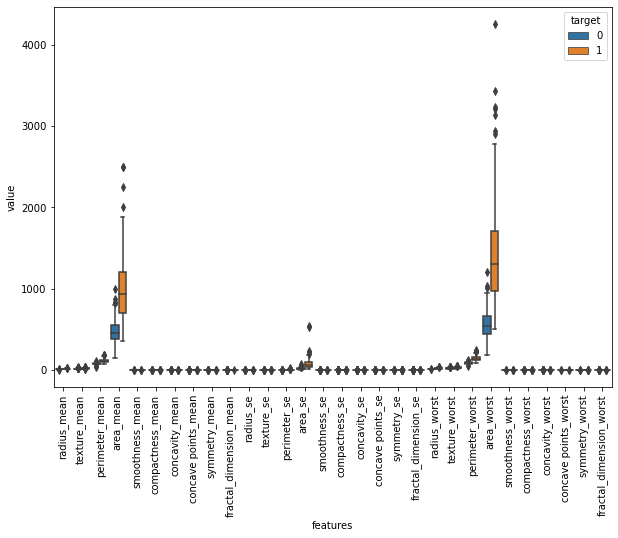

In [15]:
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90) 
plt.show()

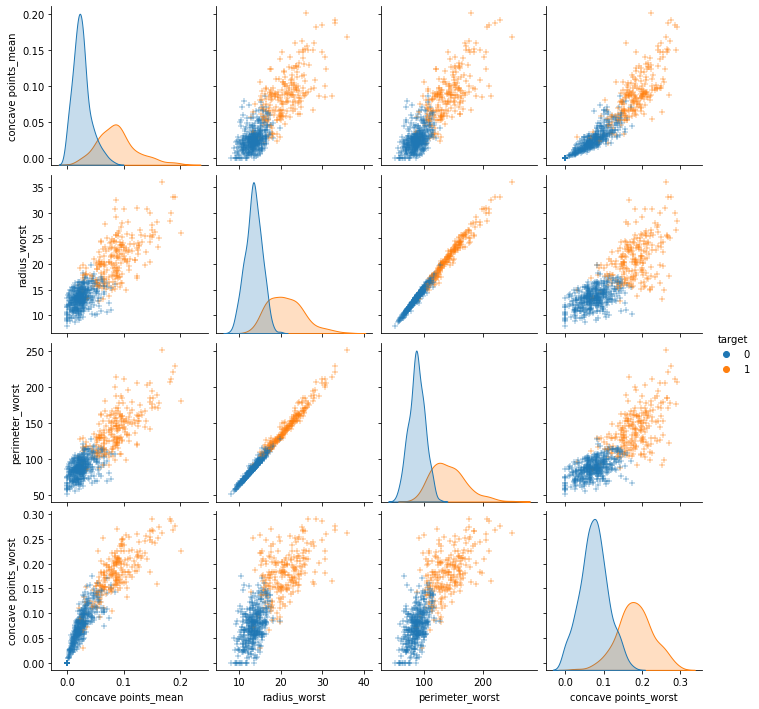

In [16]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

In [17]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

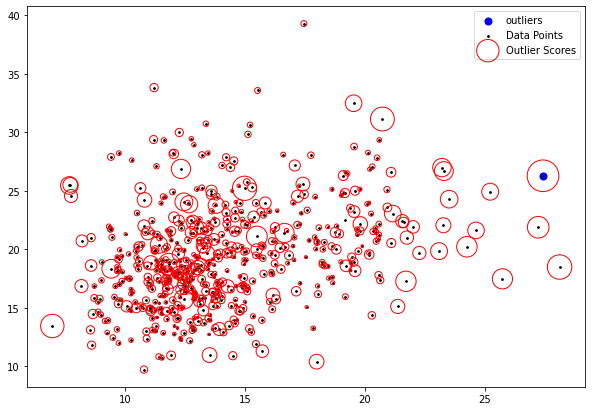

In [18]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k", s = 3, label = "Data Points")
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend() 
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA

In [20]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

X_train 398
X_test 171
Y_train 398
Y_test 171


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.608187e-16,-5.810539e-16,-6.058805e-16,2.041918e-16,-1.896863e-17,-1.087907e-16,-1.737862e-16,-1.497964e-16,7.400557e-16,2.945717e-16,...,6.058805e-16,-1.980549e-16,-3.057298e-16,-1.991707e-16,8.828784e-16,-1.439385e-16,1.246909e-16,8.926416e-17,-2.807637e-16,1.506333e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.836464e+00,-2.245111e+00,-1.810311e+00,-1.365377e+00,-2.433051e+00,-1.640911e+00,-1.132915e+00,-1.286097e+00,-2.370161e+00,-1.754890e+00,...,-1.587373e+00,-2.243853e+00,-1.600220e+00,-1.154748e+00,-2.197162e+00,-1.446868e+00,-1.370635e+00,-1.784161e+00,-2.117613e+00,-1.628809e+00
25%,-6.863161e-01,-7.102232e-01,-6.781539e-01,-6.517481e-01,-7.572809e-01,-7.800619e-01,-7.523426e-01,-7.367012e-01,-6.980367e-01,-6.905392e-01,...,-6.701191e-01,-7.380288e-01,-6.906849e-01,-6.320618e-01,-7.587574e-01,-6.855591e-01,-7.760495e-01,-7.829110e-01,-6.511070e-01,-7.077340e-01
50%,-2.551700e-01,-1.090984e-01,-2.587218e-01,-3.167308e-01,-9.722838e-02,-2.350839e-01,-3.369099e-01,-3.804602e-01,-5.620170e-02,-1.849553e-01,...,-2.737620e-01,-5.832825e-02,-2.911130e-01,-3.407646e-01,-2.705181e-02,-2.683733e-01,-2.159212e-01,-2.283327e-01,-1.213010e-01,-1.927549e-01
75%,5.419902e-01,5.692460e-01,5.510809e-01,3.839945e-01,6.191923e-01,5.332330e-01,5.017380e-01,6.776427e-01,5.679340e-01,4.618745e-01,...,5.048709e-01,6.496585e-01,5.428353e-01,3.147198e-01,6.187627e-01,6.232624e-01,5.931956e-01,7.297391e-01,4.394337e-01,4.691161e-01
max,3.945850e+00,4.780684e+00,3.967339e+00,5.137153e+00,4.904988e+00,4.068820e+00,4.357306e+00,4.055859e+00,4.608979e+00,4.803888e+00,...,4.120586e+00,3.999076e+00,4.353182e+00,5.915678e+00,3.767380e+00,4.640507e+00,3.241075e+00,2.535233e+00,6.033124e+00,5.113359e+00


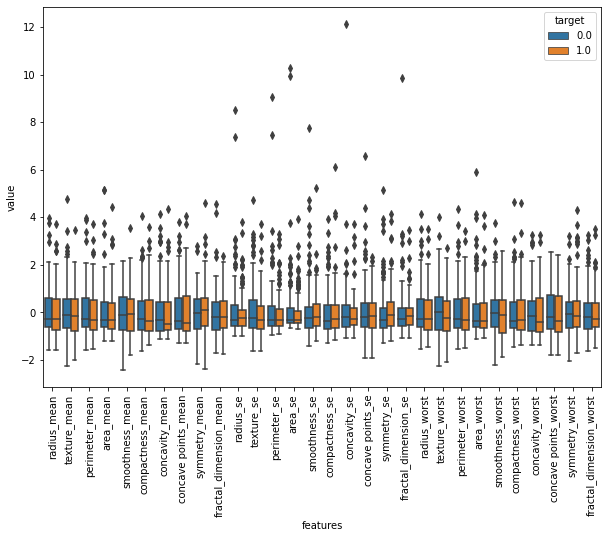

In [22]:
X_train_df["target"] = Y_train
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

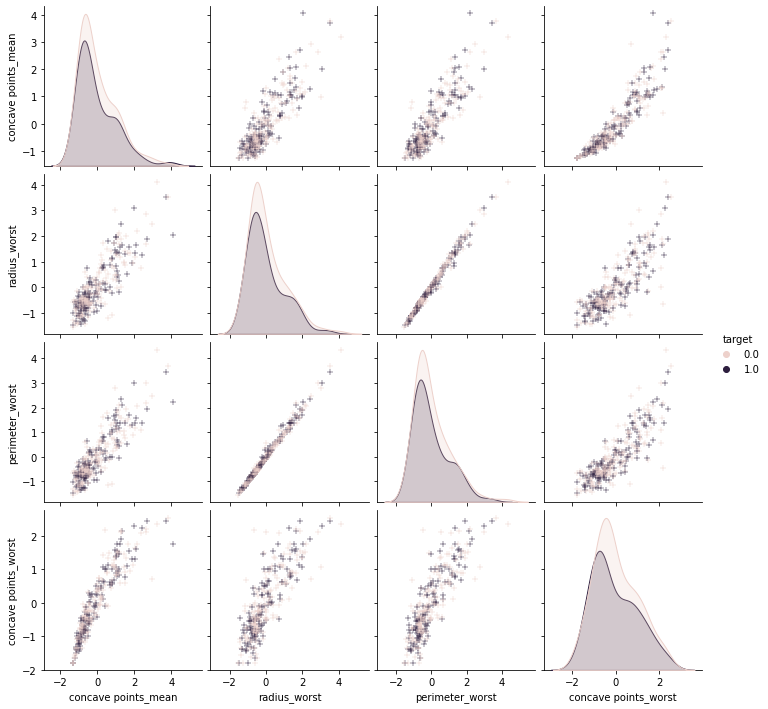

In [23]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)

print("Basic KNN Accuracy: % {}".format(acc))
print("Score : ", score)
print("CM : ", cm)

Basic KNN Accuracy: % 0.9532163742690059
Score :  0.9532163742690059
CM :  [[107   1]
 [  7  56]]


In [25]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
     
    knn = KNeighborsClassifier()
    
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score : {} with paremeters : {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) # best paremetre olarak gelen değerlerimiz.
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test) 
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test) 


Best training score : 0.9648076923076923 with paremeters : {'n_neighbors': 8, 'weights': 'distance'}

Test Score: 0.9590643274853801, Train Score: 1.0

CM Test:  [[105   3]
 [  4  59]]
CM Train:  [[249   0]
 [  0 149]]


Text(0.5, 1.0, 'PCA : p1 vs p2')

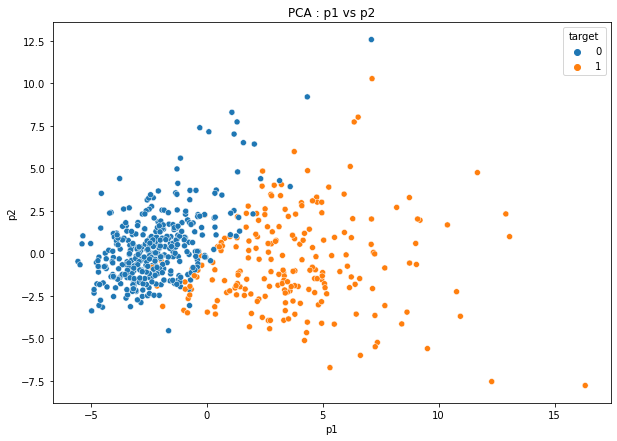

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#We reduce 30 featurs to 2 
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
plt.figure(figsize=(10,7))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA : p1 vs p2")

In [27]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)
#We send our data by calling the function we wrote.
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score : 0.9346153846153846 with paremeters : {'n_neighbors': 11, 'weights': 'uniform'}

Test Score: 0.935672514619883, Train Score: 0.9371859296482412

CM Test:  [[104   4]
 [  7  56]]
CM Train:  [[241   8]
 [ 17 132]]
